# Road Damage Dataset Tutorial
Welcome to the tutorial of Road Crack Dataset.
In this tutorial, we will show you:
- How to download Road Crack Dataset
- The structure of the Dataset
- The statistical information of the dataset
- How to evaluate your result

If you have something wrong, please contact :
`maedahi@iis.u-tokyo.ac.jp`

# Required library
In this tutorial, you need to set up tensorflow 1.4 (We recommend tensorflow-gpu 1.4).

It takes only 10 mins if you already prepared CUDA settings, please view [tensorflow website](https://www.tensorflow.org/install/). We recomend [Installing with virtualenv](https://www.tensorflow.org/install/install_linux).
- tensorflow 1.4

# The sturcture of Road Damage Dataset
Road Damage Dataset contains trained models and Annotated images.
Annotated images are presented as the same format to [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/).
- trainedModels
    - SSD_inception
    - SSD_mobilenet
- RoadCrackDataset (dataset structure is the same format as PASCAL VOC)
    - Adachi
        - JPEGImages : contains images
        - Annotations : contains xml files of annotation
        - ImageSets : contains text files that show training or evaluation image list
    - Chiba
    - Muroran
    - Ichihara
    - Sumida
    - Nagakute
    - Numazu

# The Definition of Road Damage

<img src="images/RoadDamageTypeDef.png">

# OK! So let's get started!
# First, download dataset and

First you need to download and extract the dataset and code.

Make sure your disk have 2GB free space for the dataset at least.

In [ ]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import six.moves.urllib as urllib

In [ ]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')

if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/RoadDamageDataset.tar.gz'):
    url_base = 'https://s3-ap-northeast-1.amazonaws.com/mycityreport/RoadDamageDataset.tar.gz'
    urllib.request.urlretrieve(url_base, '/content/drive/MyDrive/Colab Notebooks/RoadDamageDataset.tar.gz')
    
    print("Download RoadDamageDataset.tar.gz Done")
    
else:
    print("You have RoadDamageDataset.tar.gz")

You have RoadDamageDataset.tar.gz


In [ ]:
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/trainedModels.tar.gz'):
    url_base = 'https://s3-ap-northeast-1.amazonaws.com/mycityreport/trainedModels.tar.gz'
    urllib.request.urlretrieve(url_base, '/content/drive/MyDrive/Colab Notebooks/trainedModels.tar.gz')
    
    print("Download trainedModels.tar.gz Done")
    
else:
    print("You have trainedModels.tar.gz")

You have trainedModels.tar.gz


In [ ]:
# this procces may take a few minutes
!tar -zxf '/content/drive/MyDrive/Colab Notebooks/RoadDamageDataset.tar.gz'
!tar -zxf '/content/drive/MyDrive/Colab Notebooks/trainedModels.tar.gz'

# The statistical information of the dataset

In [ ]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [ ]:
os.getcwd()

'/content'

In [ ]:
base_path = os.getcwd() + '/RoadDamageDataset/'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs corresponds to municipality name.
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]


In [ ]:
# the number of total images and total labels.
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))
print(cls_names)

total
# of images：9053
# of labels：15457
['D01', 'D11', 'D01', 'D43', 'D00', 'D01', 'D11', 'D44', 'D00', 'D00', 'D00', 'D01', 'D01', 'D00', 'D00', 'D01', 'D11', 'D01', 'D43', 'D20', 'D43', 'D01', 'D01', 'D44', 'D01', 'D01', 'D01', 'D44', 'D43', 'D43', 'D20', 'D43', 'D11', 'D11', 'D44', 'D01', 'D01', 'D11', 'D44', 'D20', 'D43', 'D01', 'D11', 'D01', 'D20', 'D01', 'D43', 'D01', 'D01', 'D00', 'D01', 'D11', 'D01', 'D43', 'D00', 'D10', 'D01', 'D43', 'D20', 'D00', 'D00', 'D44', 'D00', 'D20', 'D00', 'D44', 'D01', 'D44', 'D44', 'D01', 'D00', 'D01', 'D00', 'D00', 'D01', 'D43', 'D10', 'D00', 'D44', 'D00', 'D01', 'D01', 'D11', 'D11', 'D01', 'D11', 'D01', 'D01', 'D44', 'D43', 'D44', 'D44', 'D44', 'D01', 'D00', 'D00', 'D44', 'D00', 'D10', 'D01', 'D01', 'D40', 'D01', 'D00', 'D20', 'D01', 'D00', 'D11', 'D10', 'D20', 'D01', 'D01', 'D44', 'D01', 'D00', 'D43', 'D44', 'D01', 'D44', 'D00', 'D01', 'D20', 'D00', 'D01', 'D11', 'D11', 'D00', 'D00', 'D43', 'D43', 'D01', 'D44', 'D01', 'D43', 'D01', 'D01', 'D43',

D00 : 2768
D01 : 3789
D10 : 742
D11 : 636
D20 : 2541
D40 : 409
D43 : 817
D44 : 3733


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


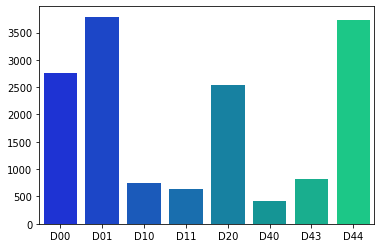

In [ ]:
# the number of each class labels.
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [ ]:
# the number of each class labels for each municipality
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    
    count_dict = collections.Counter(cls_names)
    cls_count = []
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
        
    print('**************************************************')

Adachi
# of images：1650
# of labels：2924
D00 : 529
D01 : 1013
D10 : 153
D11 : 279
D20 : 172
D40 : 11
D43 : 191
D44 : 567
**************************************************
Chiba
# of images：467
# of labels：797
D00 : 183
D01 : 187
D10 : 13
D11 : 12
D20 : 27
D40 : 3
D43 : 104
D44 : 267
**************************************************
Ichihara
# of images：254
# of labels：482
D00 : 175
D01 : 71
D10 : 18
D11 : 9
D20 : 43
D40 : 8
D43 : 20
D44 : 138
**************************************************
Muroran
# of images：2145
# of labels：3601
D00 : 671
D01 : 574
D10 : 124
D11 : 88
D20 : 1192
D40 : 189
D43 : 50
D44 : 712
**************************************************
Nagakute
# of images：1366
# of labels：2302
D00 : 482
D01 : 477
D10 : 169
D11 : 58
D20 : 351
D40 : 14
D43 : 90
D44 : 659
**************************************************
Numazu
# of images：2032
# of labels：3711
D00 : 560
D01 : 807
D10 : 245
D11 : 129
D20 : 735
D40 : 165
D43 : 161
D44 : 908
************************************

# Check some images in this dataset

In [ ]:
# import sys

# sys.path.append('/usr/local/lib/python2.7/site-packages')

In [ ]:
import cv2
import random

In [ ]:
def draw_images(image_file):
    gov = image_file.split('_')[0]
    img = cv2.imread(base_path + gov + '/JPEGImages/' + image_file.split('.')[0] + '.jpg')
    
    infile_xml = open(base_path + gov + '/Annotations/' +image_file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

In [ ]:
for damageType in damageTypes:
    tmp = []
    for gov in govs:
        file = open(base_path + gov + '/ImageSets/Main/%s_trainval.txt' %damageType, 'r')

        for line in file:
            line = line.rstrip('\n').split('/')[-1]

            if line.split(' ')[2] == '1':
                tmp.append(line.split(' ')[0]+'.xml')
        
        
    random.shuffle(tmp)
    fig = plt.figure(figsize=(6,6))
    for number, image in enumerate(tmp[0:1]):
        img = draw_images(image)
        plt.subplot(1,1,number+1)
        plt.axis('off')
        plt.title('The image including ' + damageType)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


Output hidden; open in https://colab.research.google.com to view.

# Next, try road damage detection using SSD_mobilenet!

# Imports

In [ ]:
import numpy as np
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# if tf.__version__ != '1.4.1':
#   raise ImportError('Please upgrade your tensorflow installation to v1.4.1!')


## Object detection imports
Here are the imports from the object detection module.

In [ ]:
# pip install tensorflow-object-detection-api


In [ ]:
from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [ ]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT =  '/content/drive/MyDrive/Colab Notebooks/RoadDamageDetector/ssd_mobilenet_RoadDamageDetector.pb' 

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/drive/MyDrive/Colab Notebooks/RoadDamageDetector/crack_label_map.pbtxt'

NUM_CLASSES = 8

## Load a (frozen) Tensorflow model into memory.

In [ ]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.compat.v1.GraphDef()

  
# tf.compat.v2.io.gfile.GFile()   # -> instead of tf.gfile.GFile()
  with tf.compat.v2.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [46]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Helper code

In [47]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size

  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
      

# Detection

In [36]:
# get images from val.txt
PATH_TO_TEST_IMAGES_DIR = os.getcwd() + '/RoadDamageDataset'
D_TYPE = ['D00', 'D01', 'D10', 'D11', 'D20','D40', 'D43']
govs = ['Adachi', 'Ichihara', 'Muroran', 'Chiba', 'Sumida', 'Nagakute', 'Numazu']

val_list = []
for gov in govs:
    file = open(PATH_TO_TEST_IMAGES_DIR +"/"+ gov + '/ImageSets/Main/val.txt', 'r')
    for line in file:
        line = line.rstrip('\n').split('/')[-1]
        val_list.append(line)
    file.close()

print("# of validation images：" + str(len(val_list)))

# of validation images：1813


In [37]:
TEST_IMAGE_PATHS=[]
random.shuffle(val_list)

for val_image in val_list[0:5]:
    TEST_IMAGE_PATHS.append(PATH_TO_TEST_IMAGES_DIR +"/"+ val_image.split('_')[0]+ '/JPEGImages/%s.jpg' %val_image)
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)
print(val_image)
print(val_list)


Muroran_20170907145716
['Adachi_20170912143330', 'Chiba_20170915132920', 'Numazu_20170906145604', 'Adachi_20170906144430', 'Muroran_20170907145716', 'Muroran_20170913143450', 'Adachi_20170908104450', 'Adachi_20170906151450', 'Numazu_20170907142540', 'Numazu_20170906131354', 'Numazu_20170906152326', 'Adachi_20170908103056', 'Muroran_20170911100637', 'Ichihara_20170929091419', 'Adachi_20170911112121', 'Sumida_20170920140148', 'Muroran_20170906135016', 'Numazu_20170906152700', 'Nagakute_20170907160523', 'Numazu_20170907142914', 'Numazu_20170906152049', 'Adachi_20170906150605', 'Sumida_20170913165541', 'Nagakute_20170912132325', 'Sumida_20170914160429', 'Sumida_20170915152542', 'Numazu_20170907141345', 'Numazu_20170907141513', 'Muroran_20170920113928', 'Ichihara_20170929093734', 'Sumida_20170915092230', 'Adachi_20170908141637', 'Numazu_20170906142856', 'Nagakute_20170913152328', 'Numazu_20170907132314', 'Adachi_20170911112453', 'Nagakute_20170912131537', 'Chiba_20170915133036', 'Adachi_201

In [48]:
import tensorflow.compat.v1 as tf2

with detection_graph.as_default():
  with tf2.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          min_score_thresh=0.3,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# !rm -rf ./RoadDamageDataset.tar.gz
# !rm -rf ./RoadDamageDataset
# !rm -rf ./trainedModels.tar.gz
# !rm -rf ./trainedModels